<a href="https://colab.research.google.com/github/Bazinga97/Recommendation-system-/blob/main/Amazon_Electronics_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Path to the CSV file in Google Drive
path = "/content/drive/MyDrive/Colab Notebooks/ratings_Electronics (1).csv"

# Load the dataset into a Pandas dataframe called ratings and skip any lines that return an error
ratings = pd.read_csv(path,
                      names=['userId', 'productId', 'rating', 'timestamp'],
                      on_bad_lines='skip')

# Save an original copy of the dataframe
ratings_original = ratings.copy(deep=True)

# Display the first few rows of the dataframe
ratings.head()


,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


# **Problem Statement **

Online E-commerce websites like Amazon, Filpkart uses different recommendation models to provide different suggestions to different users. Build your own recommendation system for products on an e-commerce website like Amazon.com.

Amazon: ** Collaborative filtering**: predict user preference by collecting preferences from other users

**Assumptions**: Two different users: having same preferences : then they most likely same preferences over other items

## Types: User_based and item_based

**User_based**: recommends items by fiding similar users

**Item_based**: similar items based on user interactions and recommends similar to ones the user has already liked


Scales: data sets and produces high-quality recommendations in real time.

Filtering matches each of the user's purchases and rated items to similar items, : recommendation list for the user.



Dataset
The source of the dataset - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/). The repository has several datasets. For this case study, we are using the Electronics dataset. The columns in this dataset are:

userId

productId

ratings

timestamp


In [8]:
## Basic imports

import math, random, warnings  ## for math module / warning controls over behaviour of warning messages in python
from time import time
from datetime import datetime
from collections import defaultdict ## create dictionaries with default values for missing keys
from IPython.core.interactiveshell import InteractiveShell ## interactive python interpreter by modifying appearence of shell by incoporating custom commands

In [9]:
import numpy as np ## import numpy library for multidimensional array and matrices
from scipy.sparse.linalg import svds  ## Singular value decomposition(SVD): decomposes a matrix into three constituent matrices for dimensionality reduction and capturing latent factors
from sklearn import model_selection ## Module includes: model selection and evalutaion = Cross-validation, train-test split and hyperparamter tuning
from sklearn.metrics.pairwise import cosine_similarity # Cosine similarity measures: similarity between two vectors in multi-dimensional space employed in recommendation and text filtering

In [10]:
# Data handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

Scikit-learn / Scikit-surprise

Scikit-learn : used for supervised and unsupervised learning for classification, clustering and dimensionality reduction


Scikit-surprise: particularly for design and building and analysing recommendation tasks

Scikit-surprise focuses : collaborative filtering techniques,

Matrix factorization,
Neighborhood-based methods,
Baseline models.

Simplify the process by  evaluating recommendation algorithms, with support for dataset handling, cross-validation, and hyperparameter tuning.


In [6]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357251 sha256=c11ce8447c0431373ebb6014b53caa2d74a24a5e58f5e6770b1551a2f5cf1e5d
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [11]:
from surprise import SVD, KNNWithMeans
from surprise import Dataset, Reader, accuracy

from surprise.model_selection import train_test_split, GridSearchCV
from surprise.prediction_algorithms.baseline_only import BaselineOnly


In [12]:
# Configure for any default setting of any library
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
%matplotlib inline
# sns.set(style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Exploratory data analysis

In [13]:
# Check the head of the dataset
ratings.head()
# Check the tail of the dataset
ratings.tail()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.000,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.000,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.000,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.000,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.000,1334707200


,userId,productId,rating,timestamp
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.000,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.000,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.000,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.000,1297555200
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.000,1312675200


In [14]:
# Check for any Null values in the dataset
ratings.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

In [15]:
# Get a dataframe consisting only of ratings that are duplicated
rating_combination = ['userId', 'productId']
ratings[ratings.duplicated(subset=rating_combination, keep=False)].sort_values(rating_combination).head()

# ratings.drop_duplicates(subset=['userId','productId','rating'],inplace=True)

,userId,productId,rating,timestamp


In [16]:

# Convert the timestamp column to a readable date time format
ratings['timestamp'] = ratings.timestamp.apply(lambda ts: datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
# Convert the datatype to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])
ratings.head()
ratings.info()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.000,2013-04-13
1,A2CX7LUOHB2NDG,0321732944,5.000,2012-07-01
2,A2NWSAGRHCP8N5,0439886341,1.000,2013-04-29
3,A2WNBOD3WNDNKT,0439886341,3.000,2013-07-22
4,A1GI0U4ZRJA8WN,0439886341,1.000,2012-04-18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     object        
 1   productId  object        
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 238.8+ MB


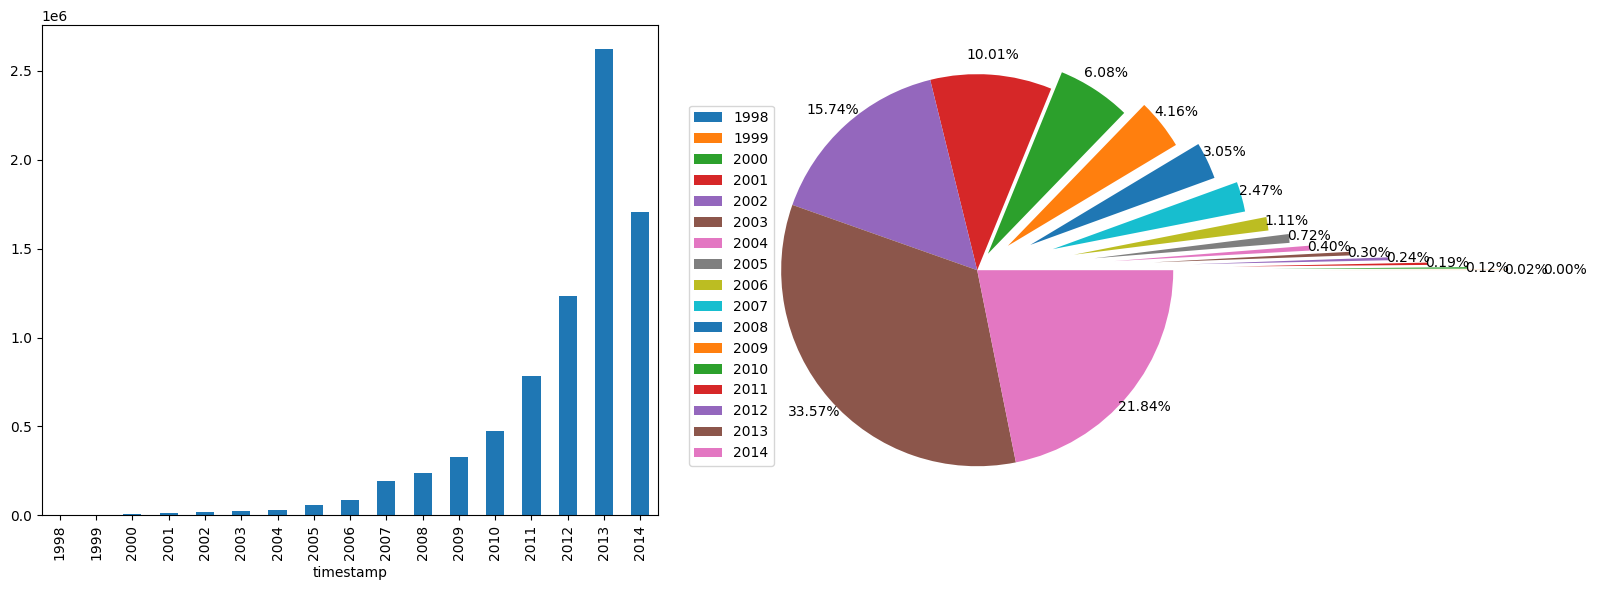

In [17]:
# Visualize the year wise ratings distribution
fig, ax = plt.subplots(1, 2, figsize=(16,6))
year_wise_count = ratings.timestamp.groupby(ratings['timestamp'].dt.year).count()
_ = year_wise_count.plot(kind='bar', ax=ax[0])
explode = (1.9,1.7,1.5,1.3,1.1,0.9,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0,0,0,0)
_ = ax[1].pie(year_wise_count, explode=explode, autopct='%1.2f%%', pctdistance=1.1)
_ = ax[1].legend(labels=year_wise_count.index,bbox_to_anchor=(0.1,0.85))
plt.tight_layout()

Time stamp is not required

In [18]:
# Drop the timestamp column
ratings.drop(labels='timestamp', axis=1, inplace=True)
ratings.head()

,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.000
1,A2CX7LUOHB2NDG,0321732944,5.000
2,A2NWSAGRHCP8N5,0439886341,1.000
3,A2WNBOD3WNDNKT,0439886341,3.000
4,A1GI0U4ZRJA8WN,0439886341,1.000


In [19]:
# Check the count of unique user and product data
unique_original = (ratings.userId.nunique(), ratings.productId.nunique())
print('Count of unique Users    :', unique_original[0])
print('Count of unique Products :', unique_original[1])

Count of unique Users    : 4201696
Count of unique Products : 476002


In [20]:
# Find the minimum and maximum ratings
print("The Minimum rating is:",ratings.rating.min())
print("The Maximum rating is:",ratings.rating.max())

The Minimum rating is: 1.0
The Maximum rating is: 5.0


Count of observations in each rating:
rating
5.000    4347541
4.000    1485781
1.000     901765
3.000     633073
2.000     456322
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='rating', ylabel='count'>

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Total Number of Ratings')

Text(0.5, 1.0, 'Distribution of Ratings')

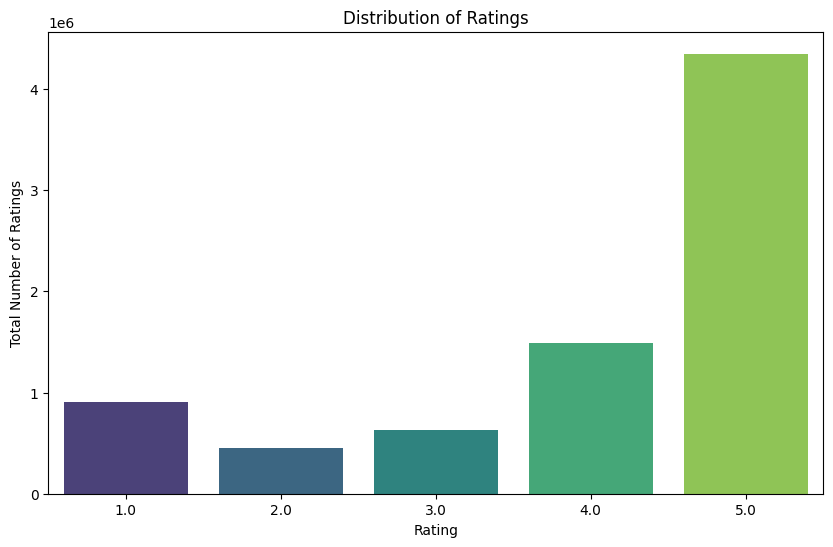

In [21]:
print('Count of observations in each rating:')
print(ratings['rating'].value_counts())

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=ratings, x='rating', palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Total Number of Ratings')
plt.title('Distribution of Ratings')
plt.show()



In [22]:
# Find the unique products under each ratings
ratings.groupby('rating')['productId'].nunique()

rating
1.000    176283
2.000    123419
3.000    152827
4.000    223845
5.000    358458
Name: productId, dtype: int64

# Many recommender systems face a challenge known as the Cold-Start problem. This occurs when a new user has not rated any items yet, making it difficult to recommend anything to them. Similarly, when a new product is introduced, it has no ratings and cannot be recommended to users. This issue contributes to data sparsity in the recommendation space.

# When users have rated only one or very few items, the effectiveness of a recommender system diminishes. It's akin to having a single point on a line, where the direction of the line remains unknown. With minimal ratings, we can only make limited assumptions about a user's preferences, reducing the confidence in our recommendations.

## To address this, I will analyze the number of ratings submitted per user to understand the extent of data sparsity in our dataset.

In [23]:
most_rated = ratings.userId.value_counts().rename_axis('UserId').reset_index(name='# ratings')
# most_rated = ratings.groupby('userId').size().sort_values(ascending=False)
most_rated.head(10)

,UserId,# ratings
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406
5,A1ODOGXEYECQQ8,380
6,A36K2N527TXXJN,314
7,A2AY4YUOX2N1BQ,311
8,AWPODHOB4GFWL,308
9,ARBKYIVNYWK3C,296


## Matrix density measures the proximity of data points when the matrix is visualized in a multi-dimensional space, where the number of dimensions equals the number of columns, and each row is a point in this space. A dense matrix features closely packed data points, creating a compact formation.



## In contrast, a sparse matrix has data points that are spread out, indicating a lack of close proximity among them.




In [24]:
# Find the density of the rating matrix
print('Total observed ratings in the dataset  :', len(ratings))
possible_num_of_ratings = ratings.userId.nunique() * ratings.productId.nunique()
print('Total ratings possible for the dataset :', possible_num_of_ratings)
density = len(ratings) / possible_num_of_ratings * 100
print('Density of the dataset                 : {:4.5f}%'.format(density))

Total observed ratings in the dataset  : 7824482
Total ratings possible for the dataset : 2000015699392
Density of the dataset                 : 0.00039%


In [25]:

# Drop the users who have rated less than 50 products
ratings = ratings[ratings.userId.isin(most_rated[most_rated['# ratings'] >= 50].UserId)]
print('# unique USERS who have rated 50 or more products :', ratings.userId.nunique())
print('# unique USERS dropped      :', unique_original[0] - ratings.userId.nunique())
print('# unique ITEMS remaining    :', ratings.productId.nunique())
print('# unique ITEMS dropped      :', unique_original[1] - ratings.productId.nunique())
print('\nFinal length of the dataset :', len(ratings))

# unique USERS who have rated 50 or more products : 1540
# unique USERS dropped      : 4200156
# unique ITEMS remaining    : 48190
# unique ITEMS dropped      : 427812

Final length of the dataset : 125871


## Number of users = 4,200,156 had not rated at least 50 products.

# Unique users:  1,540 having rated 50 or more products. This represents approximately 0.04% of the total number


## Removal of 427,812 unique products and their associated ratings.
## The refined dataset now contains 48,190 unique products, which is about 10% of the original list of products.

## Overall, we dropped 7,698,611 records, reducing the dataset from 7,824,482 to 125,871 records. This means we eliminated approximately 98.4% of the original dataset.

In [26]:
# Find the density of the final matrix
final_ratings_matrix = ratings.pivot(index='userId', columns='productId', values='rating').fillna(0)
print('Shape of final_ratings_matrix          :', final_ratings_matrix.shape)
print('Total observed ratings in the dataset  :', len(ratings))
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('Total ratings possible for the dataset :', possible_num_of_ratings)
density = len(ratings) / possible_num_of_ratings * 100
print('Density of the dataset                 : {:4.2f}%'.format(density))

Shape of final_ratings_matrix          : (1540, 48190)
Total observed ratings in the dataset  : 125871
Total ratings possible for the dataset : 74212600
Density of the dataset                 : 0.17%


### Train_Test Split

In [27]:
trainset, testset = model_selection.train_test_split(ratings, test_size=0.3, random_state=5)
trainset.head()
testset.head()

,userId,productId,rating
5815696,A197T2N6RU7K56,B007N6OED8,5.000
412740,A3HR0ZZOFKQ97N,B0001Y7UAI,5.000
444340,AGHZXQL9F94T9,B0002A6YVC,2.000
3481712,A2XJMQ2COPGWJH,B003NSBF32,2.000
4580022,A2D1LPEUCTNT8X,B004YKKT26,4.000


,userId,productId,rating
4930282,A2UOHALGF2X77Q,B005G81E9M,3.000
3333831,A27M75LRSJ788H,B003FG6IV6,5.000
7490425,A35W3JQYP0M655,B00E3FHXYO,5.000
679608,A1FR68QH6Z4YZM,B0009R3N9E,5.000
583942,A25FL6VLD7S23S,B00079Q5DK,2.000


Text(0.5, 1.0, 'Training Set')

<Axes: title={'center': 'Training Set'}, xlabel='rating', ylabel='count'>

Text(0.5, 1.0, 'Testing Set')

<Axes: title={'center': 'Testing Set'}, xlabel='rating', ylabel='count'>

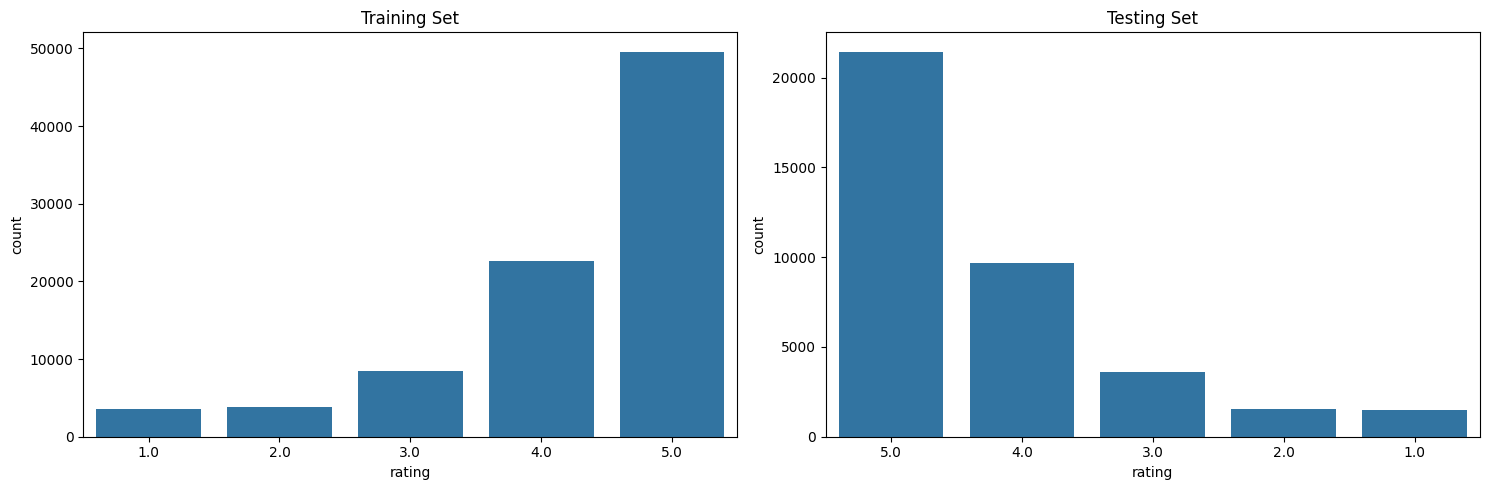

In [28]:
# Check the ratings distribution in both train and test set
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for training set
axes[0].set_title('Training Set')
sns.countplot(x='rating', data=trainset, ax=axes[0])

# Plot for testing set
axes[1].set_title('Testing Set')
sns.countplot(x='rating', data=testset, ax=axes[1], order=testset['rating'].value_counts().index)

# Adjust layout
plt.tight_layout()
plt.show()



## Building Recommender model


Based on popularity

In [29]:
import pandas as pd

def recommend_popular(df, top_n, userId=None):
    """
    Generate a list of top N product recommendations based on popularity.

    Parameters:
    df (pd.DataFrame): DataFrame containing product scores.
    top_n (int): Number of top recommendations to return.
    userId (int, optional): User ID for whom the recommendations are being generated.

    Returns:
    pd.DataFrame: DataFrame containing the top N product recommendations.
    """
    # Ensure the DataFrame has the necessary columns
    if 'score' not in df.columns or 'productId' not in df.columns:
        raise ValueError("DataFrame must contain 'score' and 'productId' columns")

    # Rank products based on their score
    df['Rank'] = df['score'].rank(ascending=False, method='first')

    # Sort the DataFrame by score and productId
    recommendations = df.sort_values(by=['score', 'productId'], ascending=[False, True])

    # Add userId column if provided
    if userId is not None:
        recommendations.insert(0, 'userId', userId)

    # Return the top N recommendations
    return recommendations.head(top_n)



A Comprehensive Approach to Popularity-Based Product Recommendations
Methodology:
To create an effective popularity-based recommendation system, three methods were combined to calculate the popularity score for each product. This approach balances different aspects of popularity to provide a comprehensive measure.

## User Count Method:

Description: Scores products based on the number of unique users who have rated them.

Calculation: Count the number of unique users who have rated each product.

Strength: Gives importance to products with more ratings.

Limitation: Ignores the quality of the ratings.

## Average Rating Method:

Description: Scores products based on the average rating they have received.
Calculation: Compute the average rating for each product.

Strength: Takes into account the quality of the ratings.

Limitation: Ignores the number of ratings; a single high rating is treated the same as multiple high ratings.


## Sum of Ratings Method:

Description: Scores products based on the total sum of all ratings they have received.

Calculation: Compute the sum of all ratings for each product.

Strength: Reflects the total positive feedback a product has received.

Limitation: Can be skewed by many low ratings and does not account for the number of ratings.

By combining these methods, the system aims to leverage the strengths of each to create a more accurate and balanced measure of product popularity.

In [30]:

def recommend_popular(df, top_n, userId=None):
    """
    Generate a list of top N product recommendations based on popularity.

    Parameters:
    df (pd.DataFrame): DataFrame containing product scores.
    top_n (int): Number of top recommendations to return.
    userId (int, optional): User ID for whom the recommendations are being generated.

    Returns:
    pd.DataFrame: DataFrame containing the top N product recommendations.
    """
    # Ensure the DataFrame has the necessary columns
    if 'popularity_score' not in df.columns or 'productId' not in df.columns:
        raise ValueError("DataFrame must contain 'popularity_score' and 'productId' columns")

    # Rank products based on their score
    df['Rank'] = df['popularity_score'].rank(ascending=False, method='first')

    # Sort the DataFrame by score and productId
    recommendations = df.sort_values(by=['popularity_score', 'productId'], ascending=[False, True])

    # Add userId column if provided
    if userId is not None:
        recommendations.insert(0, 'userId', userId)

    # Return the top N recommendations
    return recommendations.head(top_n)

def calculate_combined_popularity_score(ratings, w1=0.2, w2=0.3, w3=0.5):
    """
    Calculate the combined popularity score for each product based on user count, average rating, and sum of ratings.

    Parameters:
    ratings (pd.DataFrame): DataFrame containing product ratings with columns 'productId' and 'rating'.
    w1 (float): Weight for user count.
    w2 (float): Weight for average rating.
    w3 (float): Weight for sum of ratings.

    Returns:
    pd.DataFrame: DataFrame with productId and their calculated combined popularity score.
    """
    # Calculate user count
    user_count = ratings.groupby('productId')['userId'].count().reset_index(name='user_count')

    # Calculate average rating
    avg_rating = ratings.groupby('productId')['rating'].mean().reset_index(name='avg_rating')

    # Calculate sum of ratings
    sum_rating = ratings.groupby('productId')['rating'].sum().reset_index(name='sum_rating')

    # Merge the metrics into a single DataFrame
    popularity_df = user_count.merge(avg_rating, on='productId').merge(sum_rating, on='productId')

    # Calculate the weighted popularity score
    popularity_df['popularity_score'] = (w1 * popularity_df['user_count'] +
                                         w2 * popularity_df['avg_rating'] +
                                         w3 * popularity_df['sum_rating'])

    # Sort by popularity score
    popularity_df = popularity_df.sort_values(by='popularity_score', ascending=False)

    return popularity_df

# Calculate combined popularity scores
popularity_scores = calculate_combined_popularity_score(ratings)

# Print the combined popularity scores
print("Combined Popularity Scores:")
print(popularity_scores)

# Find recommendation for top 5 products
top_5_recommendations = recommend_popular(popularity_scores[['productId', 'popularity_score']], 5)
print("\nTop 5 Recommendations:")
print(top_5_recommendations)

# Find recommendation for a couple of users
find_recom = {'A197T2N6RU7K56': 6,
              'A1FR68QH6Z4YZM': 3,
              'A10AFVU66A79Y1': 8}   # This list is user, top_n recommendation dict.

for user in find_recom:
    print(f"\nTop {find_recom[user]} recommendations for the userId: {user}")
    user_recommendations = recommend_popular(popularity_scores[['productId', 'popularity_score']], find_recom[user], user)
    print(user_recommendations)


Combined Popularity Scores:
        productId  user_count  avg_rating  sum_rating  popularity_score
24827  B003ES5ZUU         184       4.864     895.000           485.759
39003  B0088CJT4U         206       4.218     869.000           476.966
11078  B000N99BBC         167       4.772     797.000           433.332
38250  B007WTAJTO         164       4.701     771.000           419.710
38615  B00829TIEK         149       4.436     661.000           361.631
...           ...         ...         ...         ...               ...
22673  B002X8GEFW           1       1.000       1.000             1.000
22675  B002X8IHPC           1       1.000       1.000             1.000
22676  B002X8IHQG           1       1.000       1.000             1.000
13414  B000XML9UA           1       1.000       1.000             1.000
22550  B002VX34N4           1       1.000       1.000             1.000

[48190 rows x 5 columns]

Top 5 Recommendations:
        productId  popularity_score  Rank
24827  B003ES5ZU

### Collaborative Filtering (CF)

Collaborative Filtering (CF) is a technique used in recommender systems to make automatic predictions about a user's interests by collecting preferences or taste information from many users.

The core assumption is that if two users agree on certain items, they are likely to agree on other items as well.

Types of Collaborative Filtering
## User-Based Collaborative Filtering (UBCF):

Computes the similarity between users. Based on these similarity scores, it identifies the most similar users and recommends products that these similar users have liked or bought previously.
Process:
Create a user-item interaction matrix.
Calculate similarity scores between users.
Identify similar users.
Recommend items liked by similar users.


## Item-Based Collaborative Filtering (IBCF):

Computes the similarity between items. Based on these similarity scores, it identifies the most similar items and recommends them to the user.

Process:
Create an item-item interaction matrix.
Calculate similarity scores between items.
Identify similar items.
Recommend items similar to those the user has liked or bought.


Similarity Metrics
Cosine Similarity:
Measures the cosine of the angle between two item vectors.
Formula:
cosine similarity


Pearson Correlation:
Measures the linear correlation between two vectors.
pearson correlation


Explicit vs. Implicit Ratings

Explicit Rating: Direct feedback from users, such as star ratings for movies or products.
Implicit Rating: Indirect feedback inferred from user behavior, such as page views, clicks, purchase records, etc.

Comparison of UBCF and IBCF

Efficiency: IBCF is generally more efficient than UBCF because there are typically more users than items, making the similarity matrix for IBCF more compact.
Stability: Similarity estimates between items tend to converge over time, allowing for pre-computation and caching, unlike user similarities which need frequent updates.
Conservatism: IBCF recommendations tend to be more conservative compared to UBCF.


Implementation Steps
Create Sparse Matrix: Construct a user-item or item-item interaction matrix.
Calculate Similarities: Use similarity metrics like cosine similarity or Pearson correlation to compute similarities between users or items.
Generate Recommendations: Based on the computed similarities, recommend items to users.

Conclusion
Collaborative filtering is a powerful technique for building recommender systems, leveraging user interactions to provide personalized recommendations. By understanding and implementing both user-based and item-based collaborative filtering, one can create effective recommendation systems that cater to user preferences and behaviors.

### A sparse matrix is a type of matrix in which most of the elements are zero.

In contrast to dense matrices, which have a significant number of non-zero elements, sparse matrices are characterized by their large proportion of zero entries.
Sparse matrices are used in various computational applications to efficiently store and process large datasets where the majority of values are zero.


# User-Item Matrix: In collaborative filtering, a sparse matrix can represent the ratings users have given to items. Since users typically rate only a small fraction of available items, the matrix is sparse.

In [31]:

# Create the User-Item sparse matrix
user_item = ratings.pivot(index='userId', columns='productId', values='rating').fillna(0)
print('Shape of User-Item sparse matrix:', user_item.shape)
user_item.head()

Shape of User-Item sparse matrix: (1540, 48190)


productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
A100WO06OQR8BQ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
A105S56ODHGJEK,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
A105TOJ6LTVMBG,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
A10AFVU66A79Y1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [32]:
# Create the Item-User sparse matrix
item_user = ratings.pivot(index='productId', columns='userId', values='rating').fillna(0)
print('Shape of Item-User sparse matrix:', item_user.shape)
item_user.head()

Shape of Item-User sparse matrix: (48190, 1540)


userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
0594451647,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0594481813,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0970407998,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0972683275,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1400501466,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [33]:

# Calculate the user-user similarity
user_similarity = cosine_similarity(user_item)
np.fill_diagonal(user_similarity, 0)
user_similarity_df = pd.DataFrame(user_similarity,index=user_item.index, columns=user_item.index)
user_similarity_df.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.000,0.011,0.000,0.015,0.026,0.000,0.024,0.034,0.012,0.020,...,0.025,0.000,0.000,0.025,0.036,0.000,0.000,0.038,0.016,0.014
A100WO06OQR8BQ,0.011,0.000,0.013,0.016,0.009,0.010,0.013,0.020,0.017,0.002,...,0.015,0.003,0.012,0.000,0.021,0.018,0.000,0.017,0.000,0.003
A105S56ODHGJEK,0.000,0.013,0.000,0.000,0.022,0.065,0.000,0.000,0.032,0.000,...,0.000,0.000,0.028,0.000,0.011,0.000,0.000,0.004,0.023,0.000
A105TOJ6LTVMBG,0.015,0.016,0.000,0.000,0.000,0.000,0.017,0.003,0.000,0.000,...,0.036,0.000,0.011,0.000,0.016,0.020,0.000,0.040,0.000,0.000
A10AFVU66A79Y1,0.026,0.009,0.022,0.000,0.000,0.021,0.000,0.000,0.000,0.015,...,0.000,0.000,0.015,0.036,0.050,0.000,0.000,0.000,0.000,0.000


In [ ]:
# Calculate the item-item similarity
item_similarity = cosine_similarity(item_user)
np.fill_diagonal(item_similarity, 0)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user.index, columns=item_user.index)
item_similarity_df.head()

In [ ]:
# Method to find top N neighbors
def find_n_neighbors(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(axis=1, func=lambda x: pd.Series(x.sort_values(ascending=False).iloc[:n].index,
                                                   index=['top{}'.format(i) for i in range(1, n+1)]))
    return df

In [ ]:

# Find 10 neighbors of each user
user_10_neighbors = find_n_neighbors(user_similarity_df, 10)
user_10_neighbors.head(10)

In [ ]:
# Find 10 neighbors of each item
item_10_neighbors = find_n_neighbors(item_similarity_df, 10)
item_10_neighbors.head(10